In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create empty disctionary of user's portfolio for analisys 
portfolio = {}

# Get portfolio tickers and shares from a user, defined period user analysis and fetch closing prices for a portfolio.
# Run Infinite loop "while True" to get as much stock tickers as user wishes to analysis and break when finished "Done". 
# Use input function for user interactions 
while True:
    
#The use of upper() in the provided code is to convert the user-inputted stock symbol to uppercase letters.
    stock = input("Enter a stock symbol (or 'done' to finish): ").upper() 
    if stock == 'DONE':
        break
    quantity = float(input(f"Enter the quantity of {stock}: "))
    portfolio[stock] = quantity

# Locate and convert the ".keys()" and ".values()" in dictionary to the list.
portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())

# Create empty disctionaty for historical_data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and download closing data in defined period of time.
historical_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    historical_data[stock_symbol] = stock_data['Close']


Enter a stock symbol (or 'done' to finish):  aapl
Enter the quantity of AAPL:  16
Enter a stock symbol (or 'done' to finish):  hd
Enter the quantity of HD:  7
Enter a stock symbol (or 'done' to finish):  unh
Enter the quantity of UNH:  5
Enter a stock symbol (or 'done' to finish):  cnq
Enter the quantity of CNQ:  36
Enter a stock symbol (or 'done' to finish):  vale
Enter the quantity of VALE:  150
Enter a stock symbol (or 'done' to finish):  sq
Enter the quantity of SQ:  34
Enter a stock symbol (or 'done' to finish):  pypl
Enter the quantity of PYPL:  36
Enter a stock symbol (or 'done' to finish):  uber
Enter the quantity of UBER:  38
Enter a stock symbol (or 'done' to finish):  baba
Enter the quantity of BABA:  30
Enter a stock symbol (or 'done' to finish):  csco
Enter the quantity of CSCO:  50
Enter a stock symbol (or 'done' to finish):  done


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
def portfolio_value(portfolio_tickers, stock_shares):
    try:
        # Download historical stock prices
        data = yf.download(portfolio_tickers, period="1d")['Close']
        
        # Get the latest prices
        current_prices = data.iloc[-1]
        
        # Calculate the value of each stock
        stock_values = current_prices * pd.Series(portfolio)
        
        # Calculate the total portfolio value
        portfolio_value = stock_values.sum()
        
        return portfolio_value
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

# Calculate portfolio value
current_portfolio_value = portfolio_value(portfolio_tickers, stock_shares)

# Display the current portfolio value
print(f"\nCurrent Portfolio Value: ${current_portfolio_value:.2f}")

[*********************100%%**********************]  10 of 10 completed

Current Portfolio Value: $24908.02


[*********************100%%**********************]  10 of 10 completed


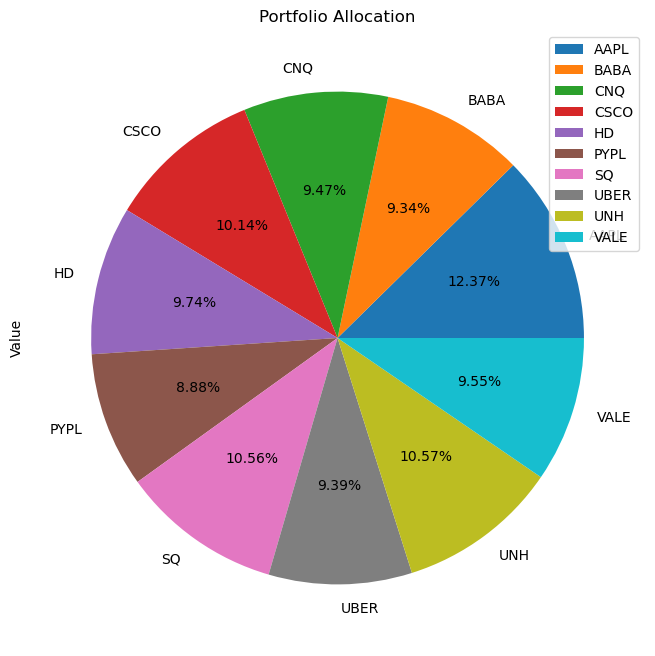

In [12]:
# Fetch stocks closing prices in the portfolio for period of one day .
data = yf.download(portfolio_tickers, period="1d")['Close'] 
current_prices = data.iloc[-1]

# Locate shares owned and calculate current values of each stock in the portfolio.
stock_shares = pd.Series(stock_shares, index=portfolio_tickers)
each_stock_value = pd.DataFrame((current_prices * stock_shares).round(2))

# Calculate percentage of each stock in the portfolio.
percentage_of_portfolio = ((each_stock_value / current_portfolio_value) * 100).round(2)

# Combine stocks values and percetage allocation in to one dataframe, define columns name and plot pie chart.
portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))
plt.legend(loc='upper right')

# Save plot in the images folder.
plt.savefig('images/portfolio_allocation.png')
portfolio_summary.to_csv('images/portfolio_summary.csv', index=False)

In [13]:
# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
historical_data = pd.DataFrame(historical_data)

portfolio_returns = historical_data.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
combined_returns

[*********************100%%**********************]  1 of 1 completed


SP500      AAPL        HD       UNH       CNQ      VALE  \
Date                                                                     
2019-05-13 -0.024131 -0.058119 -0.021791 -0.004323 -0.039901 -0.039294   
2019-05-14  0.008016  0.015830  0.006725 -0.013024  0.024641  0.005008   
2019-05-15  0.005839  0.011979  0.000731 -0.001480 -0.002872 -0.003322   
2019-05-16  0.008895 -0.004400  0.003233  0.003007  0.000720 -0.040833   
2019-05-17 -0.005837 -0.005682  0.001040  0.019384 -0.019425  0.006950   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.001660 -0.005547 -0.001089  0.000827  0.005394 -0.001902   
2023-12-26  0.004232 -0.002841  0.002065 -0.000538  0.035408  0.012071   
2023-12-27  0.001430  0.000518 -0.002233  0.005307 -0.014804  0.005022   
2023-12-28  0.000370  0.002226 -0.003357  0.004036 -0.018182 -0.007495   
2023-12-29 -0.002826 -0.005424 -0.002332  0.002991  0.002755 -0.001888   

                  SQ      PYPL      UBER      BABA      CSCO  
Date                                                          
2019-05-13 -0.054554 -0.032425 -0.107529 -0.044888 -0.038606  
2019-05-14  0.027569  0.021155  0.077089  0.028410  0.014035  
2019-05-15  0.017470  0.022092  0.033283  0.015786  0.008074  
2019-05-16  0.017937  0.021256  0.041414 -0.011430  0.066552  
2019-05-17 -0.016416 -0.009397 -0.025349 -0.034174  0.007509  
...              ...       ...       ...       ...       ...  
2023-12-22  0.003121 -0.003545  0.004068 -0.012851  0.007847  
2023-12-26  0.013482  0.011643  0.004375  0.007572  0.003793  
2023-12-27  0.018163  0.001918  0.020974  0.003428  0.003182  
2023-12-28 -0.001131  0.006382 -0.002212  0.014847  0.000793  
2023-12-29 -0.027166 -0.026474 -0.024865  0.003496  0.000792  

[1168 rows x 11 columns]

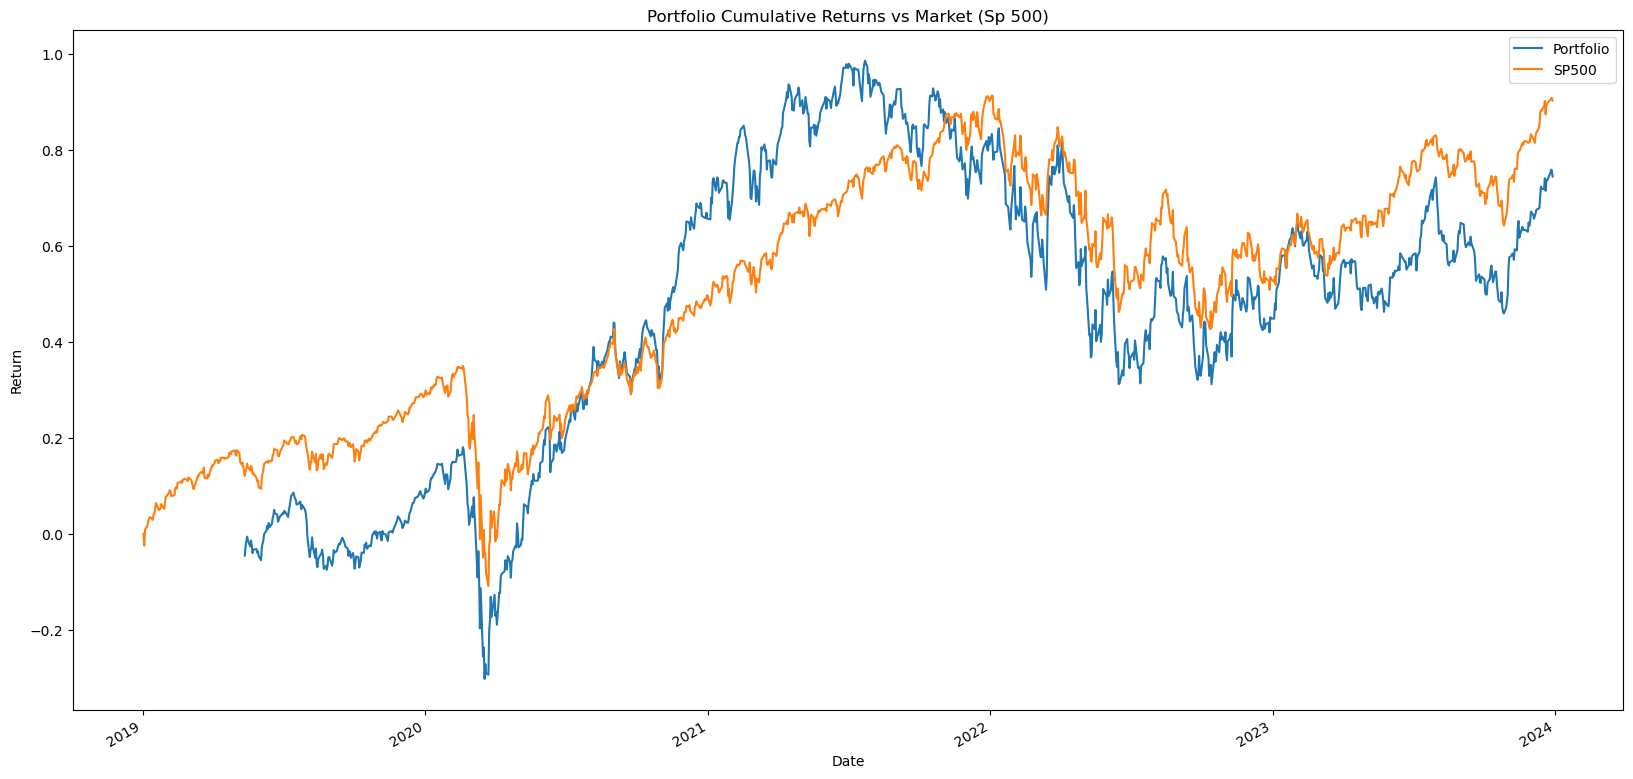

In [14]:
# Sum the average returns of the portfolio and calculate cumulative returns of the portfolio and then plot it.
portfolio_average_returns = portfolio_returns.mean(axis=1)
portfolio_cumulative_returns = (1 + portfolio_average_returns).cumprod() - 1
ax = portfolio_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Portfolio Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
# Calculate cumulative returns of th market and plot it against our portfolio.
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, label='SP500', legend=True)

# Save plot in the images folder.
plt.savefig('images/cumulative_returns.png')

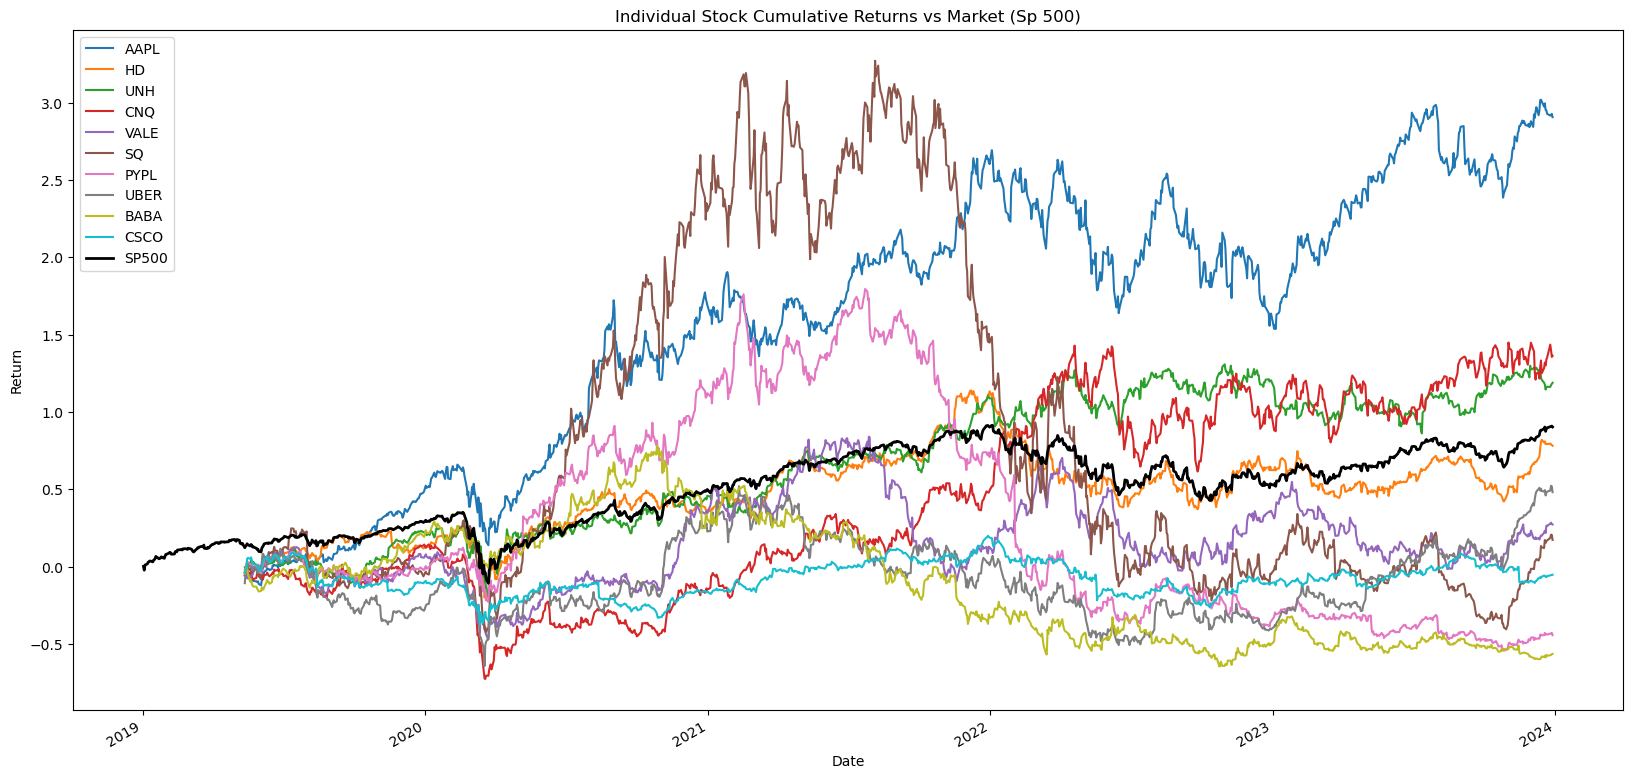

In [36]:
stock_cumulative_returns = (1 + portfolio_returns).cumprod() - 1
ax = stock_cumulative_returns.plot(figsize=(20,10), 
                        ylabel='Return',
                        title='Individual Stock Cumulative Returns vs Market (Sp 500)',
                        label='Portfolio',
                        legend=True)
spy500_cumulative_returns = (1 + sp500_returns).cumprod() - 1
spy500_cumulative_returns.plot(ax=ax, 
                               label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2)
plt.savefig('images/individual_cumulative_returns.png')

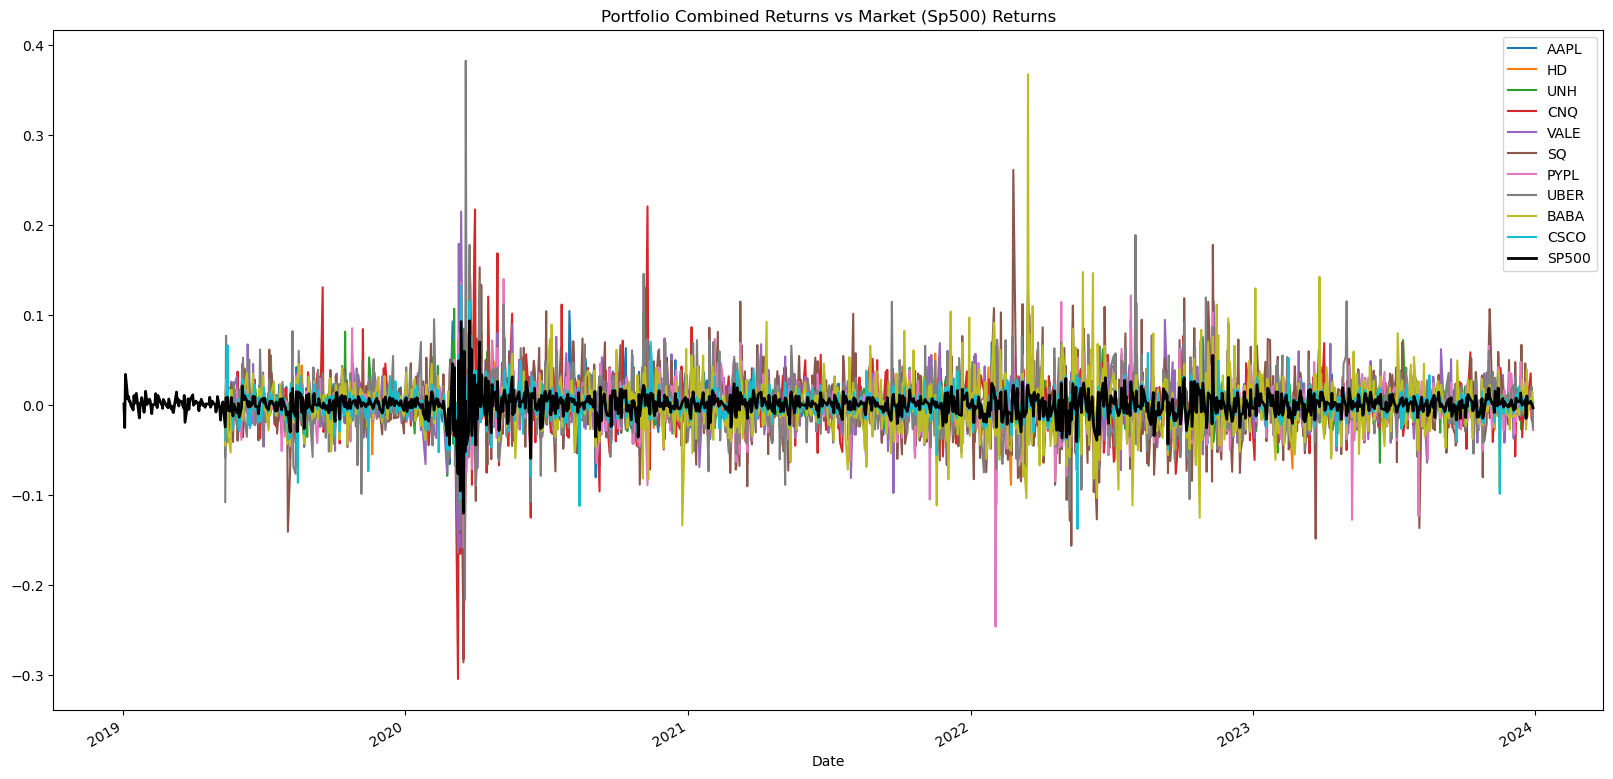

In [35]:
# Plot portfolio retuns and market retuns # Save plot in the images folder.

ax = portfolio_returns.plot(figsize=(20,10),
                       title='Portfolio Combined Returns vs Market (Sp500) Returns', 
                       legend=True)

sp500_returns.plot(ax=ax, label='SP500', 
                               legend=True,
                               color='black', 
                               linewidth=2) 

plt.savefig('images/combined_returns.png')

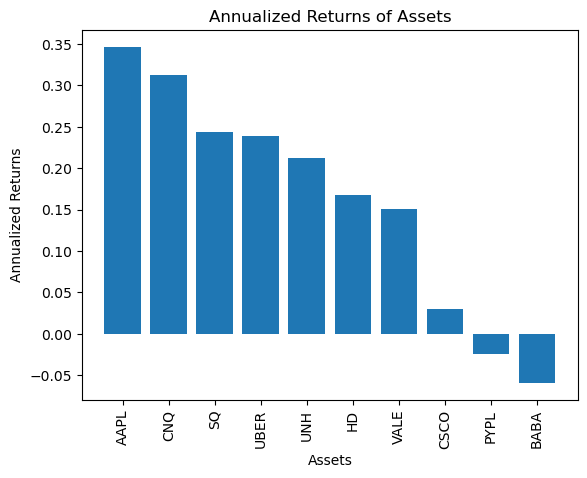

In [17]:
# define the risk free rate
risk_free_rate = 0.04/252 # annualized yield of 3-month Treasury bill divided by 252 trading days

# calculate the excess returns of each stock in the portfolio
excess_returns = portfolio_returns * stock_shares - risk_free_rate


# Calculate the annual returns
annual_daily_returns = portfolio_returns.mean() * 252
annual_excess_returns = excess_returns.mean() * 252

# Calculate the daily standard deviations
portfolio_returns_std = portfolio_returns.std()

# CAluculating the excess returns
excess_returns_std = excess_returns.std()


######### annual STD

# Calculate the annualized standard deviation (252 trading days)
stock_annualized_std = portfolio_returns_std * np.sqrt(252)
portfolio_annualized_std = excess_returns_std * np.sqrt(252)

# Calculate the stock risk
annual_stock_risk = portfolio_returns_std * math.sqrt(252)
annual_excess_risk = excess_returns_std * math.sqrt(252)

# Sorted the data in decending order
sorted_annual_returns = annual_daily_returns.sort_values(ascending=False)
sorted_annual_excess_returns = annual_excess_returns.sort_values(ascending=False)


# plot the sorted annualized returns of stock
plt.bar(sorted_annual_returns.index, sorted_annual_returns)
plt.ylabel("Annualized Returns")
plt.xlabel('Assets')

plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets')
plt.savefig('images/annualized_returns.png')

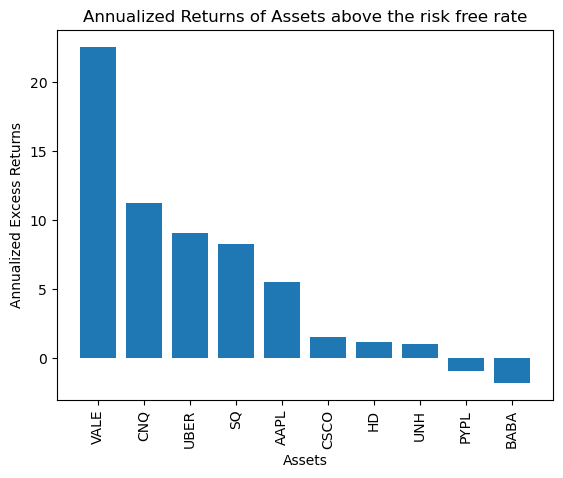

In [18]:
# Plot of the excess annual returns
# plot the sorted annualized returns of stock
plt.bar(sorted_annual_excess_returns.index, sorted_annual_excess_returns)
plt.ylabel("Annualized Excess Returns")
plt.xlabel('Assets')
plt.xticks(rotation=90)
plt.title('Annualized Returns of Assets above the risk free rate')
plt.show()

In [19]:
# creat a dataframe to store the annual returns, annual risks, annual excess returns and company ticker and new column for the ratio

risk_df = pd.DataFrame()
risk_df['Expected Annual Returns'] = annual_daily_returns
risk_df['Expected Annual Risk'] = annual_stock_risk
risk_df['Expected Annual Excess Returns'] = annual_excess_returns
risk_df['Stock'] = portfolio_tickers
risk_df['Ratio'] = risk_df['Expected Annual Returns'] / risk_df['Expected Annual Risk']

# show in decending order for the expected annual returns
risk_df.sort_values(by="Ratio", axis = 0, ascending=False, inplace=False)

Expected Annual Returns  Expected Annual Risk  \
AAPL                 0.346603              0.324133   
UNH                  0.212881              0.295977   
CNQ                  0.312227              0.497464   
HD                   0.168043              0.292705   
UBER                 0.238728              0.560664   
SQ                   0.243662              0.646034   
VALE                 0.150650              0.445801   
CSCO                 0.030347              0.289173   
PYPL                -0.024586              0.449043   
BABA                -0.059160              0.496849   

      Expected Annual Excess Returns Stock     Ratio  
AAPL                        5.505654  AAPL  1.069325  
UNH                         1.024406   UNH  0.719250  
CNQ                        11.200188   CNQ  0.627639  
HD                          1.136302    HD  0.574105  
UBER                        9.031671  UBER  0.425796  
SQ                          8.244499    SQ  0.377165  
VALE                       22.557565  VALE  0.337932  
CSCO                        1.477348  CSCO  0.104944  
PYPL                       -0.925102  PYPL -0.054752  
BABA                       -1.814806  BABA -0.119071

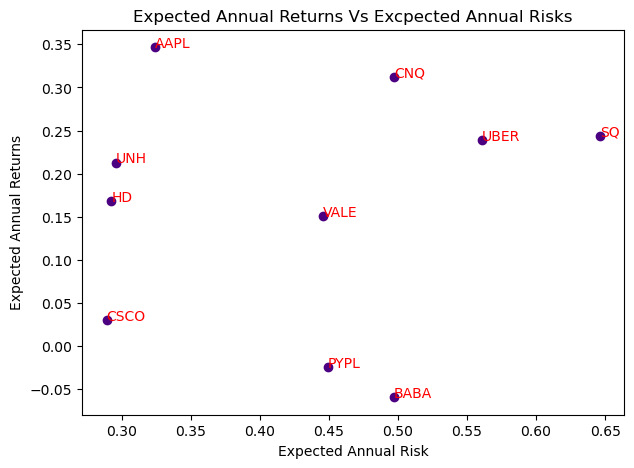

In [20]:
# visually show the ecpected annual returns vs the expected annual risk
risk_df.hvplot.bar()

fig, ax = plt.subplots(figsize=(7,5))
plt.title('Expected Annual Returns Vs Excpected Annual Risks')
ax.scatter(risk_df['Expected Annual Risk'], risk_df['Expected Annual Returns'], c = "indigo")
ax.set_xlabel('Expected Annual Risk')
ax.set_ylabel('Expected Annual Returns')
          
# note the points on plot
for idx, row in risk_df.iterrows():
    ax.annotate(row["Stock"], (row['Expected Annual Risk'], row['Expected Annual Returns']), c = 'red')
plt.savefig('images/portfolio_risk_return.png')

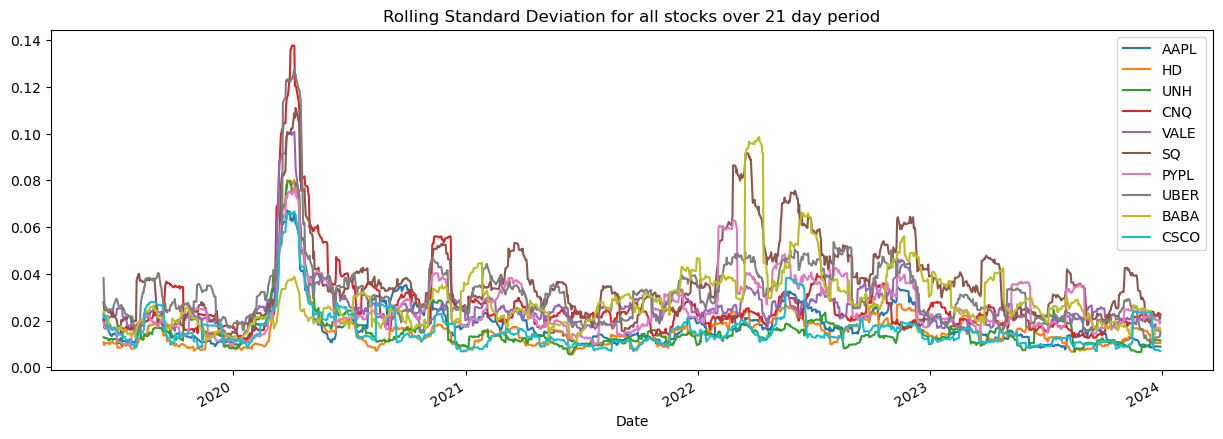

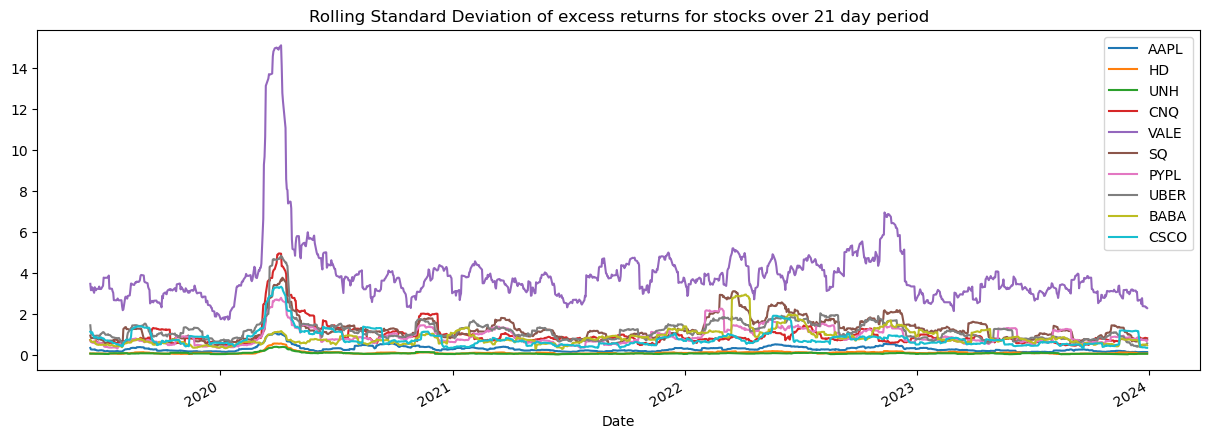

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = portfolio_returns.rolling(window=21).std()
excess_rolling_std = excess_returns.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation for all stocks over 21 day period')
plt.savefig('images/standard_deviation.png')
# Plotting excess
excess_rolling_std.plot(figsize=(15,5), title= 'Rolling Standard Deviation of excess returns for stocks over 21 day period')
plt.savefig('images/excess_return.png')



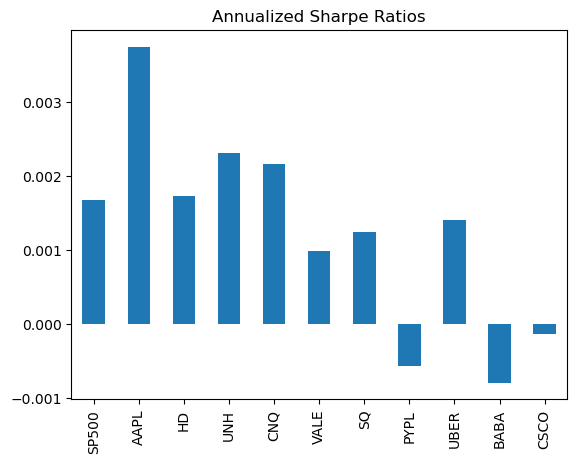

In [24]:
# Annualized Sharpe Ratios. Calculate sharpe ratio assuming risk free rate is 0
risk_free_rate
annualized_sharpe = ((combined_returns.mean() - risk_free_rate) / (combined_returns.std() * np.sqrt(252)))
# Visualize the sharpe ratios as a bar plot
annualized_sharpe.plot(kind='bar', 
                       title='Annualized Sharpe Ratios')
plt.savefig('gui_images/annualized_sharpe.png')

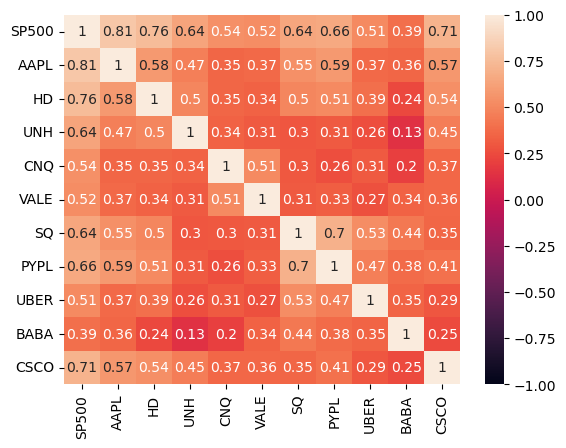

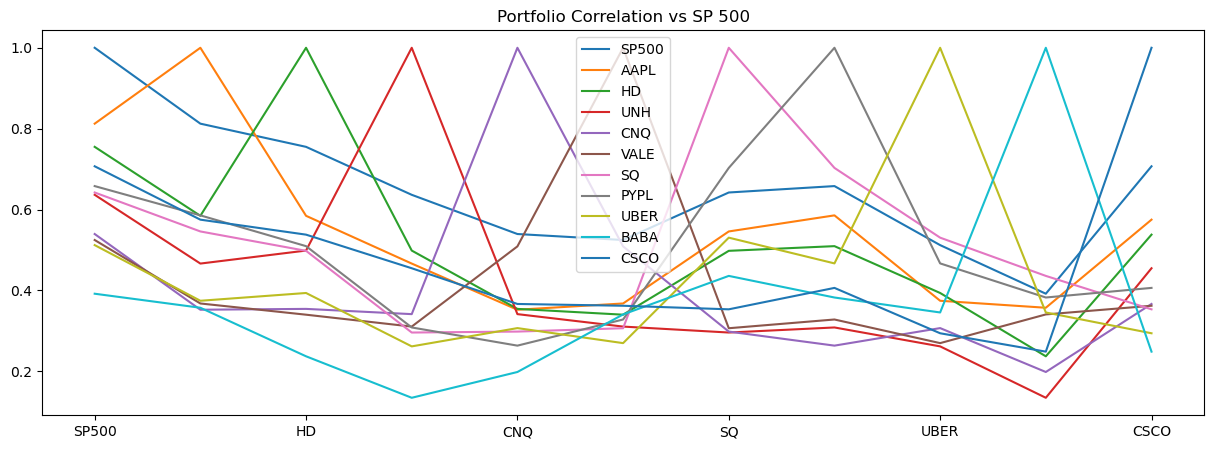

In [25]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
plt.savefig('images/correlation_heatmap.png')

correlation_matrix.plot(figsize=(15,5), title='Portfolio Correlation vs SP 500')
plt.savefig('images/correlation_matrix.png')

In [26]:
# Calculate portflio weight
portfolio_weights = [(percentage / 100) for percentage in portfolio_summary['Percentage'].tolist()]

portfolio_tickers = list(portfolio.keys())
stock_shares = list(portfolio.values())

# Create empty disctionaty for portfolio data to save all downloaded data.
# Run "for" loop to iterate through each stock ticker in the list and 
# download all data in defined period of time.

portfolio_data = {}
for stock_symbol in portfolio.keys():
    stock_data = yf.download(stock_symbol, period="5y")
    portfolio_data[stock_symbol] = stock_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
# Concatenate portfolio data, concatenate along the columns and asign keys for each stock
portfolio_data_df = pd.concat(portfolio_data.values(),  axis=1, keys=portfolio_data.keys())

# Change column names to upper case for tickers and lower case for definition
portfolio_data_df.columns = portfolio_data_df.columns.map(lambda x: (x[0].upper(), x[1].lower()))


# Difine number of simulation
num_sims = 500

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = portfolio_data_df,
    weights = portfolio_weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)
MC_10years.portfolio_data.dropna()

AAPL                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2019-05-13   46.927502   47.369999   45.712502   46.430000   44.927494   
2019-05-14   46.602501   47.424999   46.352501   47.165001   45.638718   
2019-05-15   46.567501   47.937500   46.505001   47.730000   46.185421   
2019-05-16   47.477501   48.117500   47.209999   47.520000   45.982220   
2019-05-17   46.732498   47.724998   46.689999   47.250000   45.720959   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

                                            HD                          ...  \
               volume daily_return        open        high         low  ...   
Date                                                                    ...   
2019-05-13  229722400    -0.058119  191.000000  191.660004  189.139999  ...   
2019-05-14  146118800     0.015830  190.500000  192.759995  190.009995  ...   
2019-05-15  106178800     0.011979  190.809998  192.809998  190.270004  ...   
2019-05-16  132125600    -0.004400  192.470001  194.960007  192.199997  ...   
2019-05-17  131516400    -0.005682  190.860001  194.500000  190.750000  ...   
...               ...          ...         ...         ...         ...  ...   
2023-12-22   37122800    -0.005547  349.040009  351.339996  346.690002  ...   
2023-12-26   28919300    -0.002841  348.429993  350.089996  348.160004  ...   
2023-12-27   48087700     0.000518  349.910004  350.000000  347.179993  ...   
2023-12-28   34049900     0.002226  348.500000  349.040009  345.799988  ...   
2023-12-29   42628800    -0.005424  345.829987  347.549988  343.019989  ...   

                  BABA                              CSCO             \
             adj close    volume daily_return       open       high   
Date                                                                  
2019-05-13  167.754929  22330700    -0.044888  51.830002  52.259998   
2019-05-14  172.520859  17874100     0.028410  51.450001  52.439999   
2019-05-15  175.244263  37610400     0.015786  51.759998  52.709999   
2019-05-16  173.241180  20579200    -0.011430  54.270000  56.400002   
2019-05-17  167.320770  22539400    -0.034174  55.779999  56.830002   
...                ...       ...          ...        ...        ...   
2023-12-22   75.279999  19962800    -0.012851  49.840000  50.389999   
2023-12-26   75.849998  13121300     0.007572  50.110001  50.400002   
2023-12-27   76.110001  14904500     0.003428  50.299999  50.560001   
2023-12-28   77.239998  18937900     0.014847  50.580002  50.630001   
2023-12-29   77.510002  14035500     0.003496  50.450001  50.590000   

                                                                    
                  low      close  adj close    volume daily_return  
Date                                                                
2019-05-13  51.060001  51.299999  44.704102  28869900    -0.038606  
2019-05-14  51.380001  52.020000  45.331532  25478300     0.014035  
2019-05-15  51.689999  52.439999  45.697517  30577200     0.008074  
2019-05-16  54.119999  55.930000  48.738800  46057800     0.066552  
2019-05-17  55.520000  56.349998  49.104794  27299300     0.007509  
...               ...        ...        ...       ...          ...  
2023-12-22  49.840000  50.090000  50.090000  12900700     0.007847  
2023-12-26  50.049999  50.279999  50.279999   9721200     0.003793  
2023-12-27  50.279999  50.439999  50.439999  10414300     0.003182  
2023-12-28  50.419998  50.480000  50.480000   85499

In [29]:
# Run monte carlo simulation
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2         3         4         5         6    \
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998212  1.009342   0.993850  0.996522  1.003786  0.997654  1.017177   
2     1.003148  1.003000   0.990010  1.000371  0.996391  0.999847  1.025940   
3     1.005278  1.013505   0.994124  1.002201  0.996404  0.991417  1.018378   
4     1.009028  1.006861   0.973978  1.004639  0.995576  0.990929  1.006747   
...        ...       ...        ...       ...       ...       ...       ...   
2516  5.515697  4.519246  10.062645  4.160667  6.828648  4.856100  4.542621   
2517  5.576822  4.615409  10.134307  4.154112  6.851495  4.854330  4.518972   
2518  5.647393  4.637625  10.038210  4.161055  6.837815  4.858064  4.507489   
2519  5.607967  4.689972  10.055126  4.180367  6.838549  4.814611  4.470348   
2520  5.604284  4.673750  10.054146  4.221872  6.811371  4.841086  4.427871   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.015710  0.988647  0.977644  ...  1.005737  0.998581  0.997663   
2     1.012016  0.985724  0.975651  ...  1.017603  1.021084  0.992247   
3     1.012241  0.975290  0.973541  ...  1.026582  1.015644  0.995327   
4     1.008907  0.977599  0.967520  ...  1.015257  1.017127  0.991003   
...        ...       ...       ...  ...       ...       ...       ...   
2516  5.210362  4.011359  9.557993  ...  2.798450  4.031755  6.574737   
2517  5.163538  3.997096  9.696835  ...  2.793831  4.054842  6.469443   
2518  5.163174  3.978281  9.620717  ...  2.781261  4.079416  6.428462   
2519  5.189967  4.005245  9.706528  ...  2.828659  4.108720  6.387256   
2520  5.201592  4.077709  9.658469  ...  2.850249  4.119483  6.441436   

           493       494       495       496       497       498        499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   1.000000  
1     1.011067  0.998884  1.001597  1.017337  0.980914  1.024306   0.993743  
2     1.003143  1.003252  1.014725  1.030094  0.978304  1.027726   0.999675  
3     0.999725  1.009642  1.031138  1.039652  0.969251  1.029203   0.998363  
4     1.000419  1.001371  1.036705  1.010998  0.981909  1.018370   0.991464  
...        ...       ...       ...       ...       ...       ...        ...  
2516  6.387689  7.758594  4.432103  8.952669  4.010453  6.634451  11.531756  
2517  6.367670  7.693847  4.412402  9.081937  4.011704  6.559504  11.429919  
2518  6.454133  7.671480  4.442969  9.073343  4.050420  6.549367  11.507000  
2519  6.475998  7.632190  4.462022  9.105244  4.069121  6.546539  11.484541  
2520  6.392774  7.655989  4.436765  9.120314  4.118790  6.440121  11.544681  

[2521 rows x 500 columns]

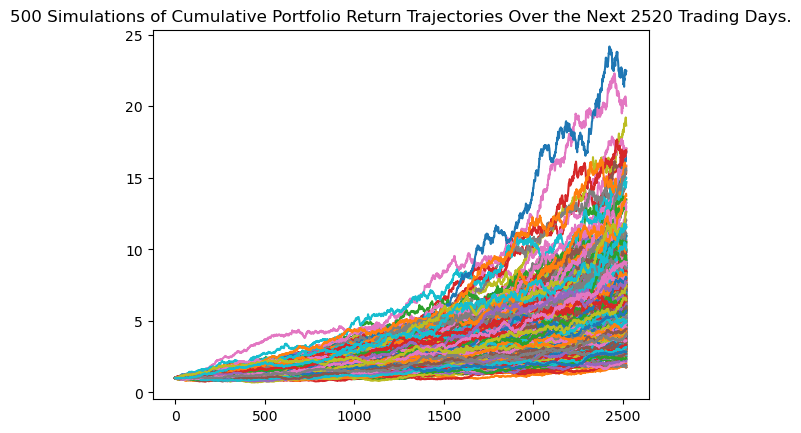

In [30]:
# Plot simulation outcomes 
line_plot = MC_10years.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("images/Monte_Carlo_10_year", bbox_inches="tight")

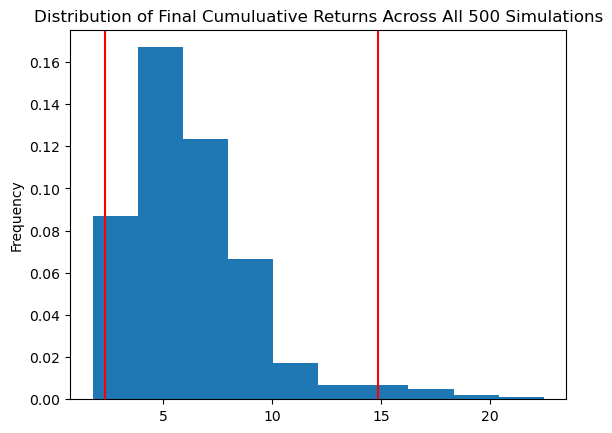

In [31]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_10years.plot_distribution()


# Save the plot for future usage
distribution_plot.get_figure().savefig('images/Monte_Carlo_10year_dist_plot.png',bbox_inches='tight')

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_summary)

count           500.000000
mean              6.271019
std               2.976854
min               1.752848
25%               4.215496
50%               5.743204
75%               7.576943
max              22.478641
95% CI Lower      2.324089
95% CI Upper     14.864444
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment_10year = current_portfolio_value

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes.
ci_lower_ten = round(MC_summary[8] * initial_investment_10year,2)
ci_upper_ten = round(MC_summary[9] * initial_investment_10year,2)
ci_average_ten = round((ci_lower_ten + ci_upper_ten)/2,2)




# Calculate annual return and annual percetage return on average.
annual_lower_return_10 = ((ci_lower_ten - initial_investment_10year) / 10)
annual_lower_percent_10 = annual_lower_return_10 / initial_investment_10year


annual_upper_return_10 = ((ci_upper_ten - initial_investment_10year) / 10)
annual_upper_percent_10 = annual_upper_return_10 / initial_investment_10year





annual_average_return_10 = ((ci_average_ten - initial_investment_10year) / 10)
annual_average_percent_10 = annual_average_return_10 / initial_investment_10year

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10year:.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f"\n${ci_lower_ten} (Lower Annual Percent Change for 10 years: {annual_lower_percent_10 * 100:.2f}%) and" 
      f"\n${ci_upper_ten} (Upper Annual Percent Change for 10 years: {annual_upper_percent_10 * 100:.2f}%)."
      f"\nOn average {ci_average_ten} (Average Annual Percent Change for 10 years: {annual_average_percent_10 * 100:.2f}%)")



There is a 95% chance that an initial investment of $24908.02 in the portfolio over the next 10 years will end within in the range of
$57888.46 (Lower Annual Percent Change for 10 years: 13.24%) and
$370243.87 (Upper Annual Percent Change for 10 years: 138.64%).
On average 214066.16 (Average Annual Percent Change for 10 years: 75.94%)
